#  課題

#### =========================================================================================

###    1.タイトル：形状や生息地等の特性からキノコが食用か有毒かを識別する
###    2.氏名：豊田
###    3.課題：kaggle2『Mushroom Classification』

####   ●kaggle　https://www.kaggle.com/uciml/mushroom-classification/data
####   ●関連サイト https://edu.deepanalytics.jp/datasets/19     https://archive.ics.uci.edu/ml/datasets/Mushroom

![mr.png](attachment:mr.png)

![Imgur](https://i.imgur.com/vchnLBC.jpg)

![Imgur](https://i.imgur.com/2F9PNJU.jpg)

#### =========================================================================================

###    4(1)目的変数と説明変数の関係を確認するためのグラフ。また、そのグラフからわかることを文章で。
###    4(2)欠測値と異常値を確認した結果。また、欠測値や異常値をが存在する場合は、その処理方法。

#### 4.1データセットの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyper
import seaborn as sns
import statsmodels.api as sm #線形回帰分析と同時にAICを計算
import itertools #組み合わせを求める
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split #トレーニングデータとテストデータに分ける
from sklearn.preprocessing import StandardScaler #データの標準化
from sklearn.model_selection import KFold #交差検証
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #回帰分析
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出

#CSVファイル読み込み
df_csv =pd.read_csv('mushrooms.csv')
display(df_csv)

C:\Users\yt690\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


#### 4.2目的変数(class)と説明変数の関係
######  ＜サマリー＞
######  ●クロス集計結果
######  ・変数stalk-root（柄の根）”に”？”が2480個(e/食用キノコ: 720 p/毒キノコ:1760)含まれている。⇒？をｎに置換して検討
######  ・変数”veil-type”は”P(つぼの種類=内皮膜)”のみであることを確認(e/食用キノコ:4208 p/毒キノコ:3916)。⇒データ削除
######  ・全変数（カラム）のデータ数（行数）は8124であり、NaNは含まれていない。

######   ●棒グラフ結果（目見）

![Imgur](https://i.imgur.com/fqYADzC.jpg)

cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


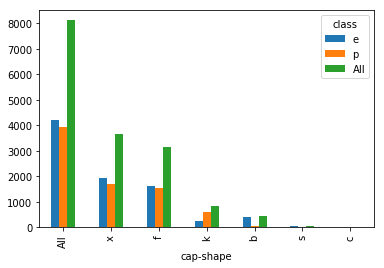

cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


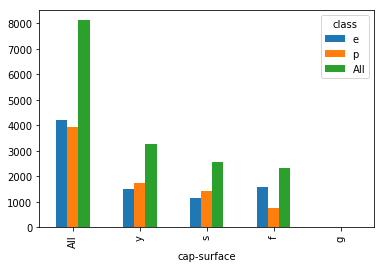

cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


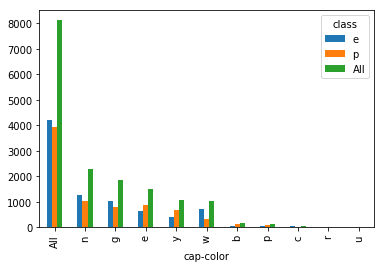

bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


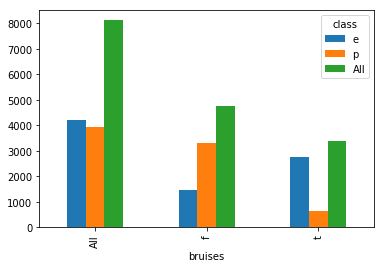

odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


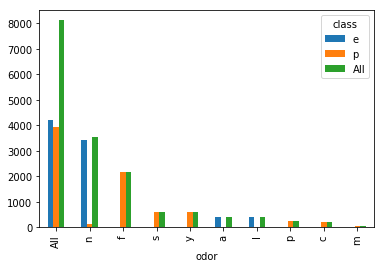

gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


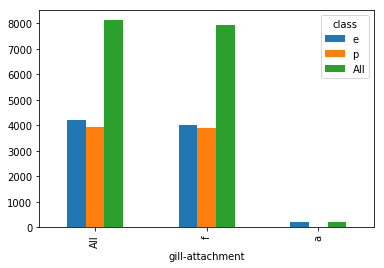

gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


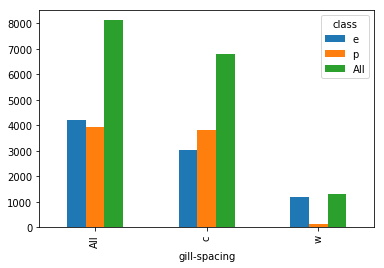

gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


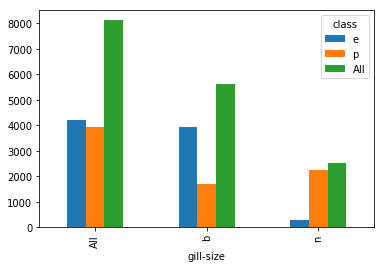

gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


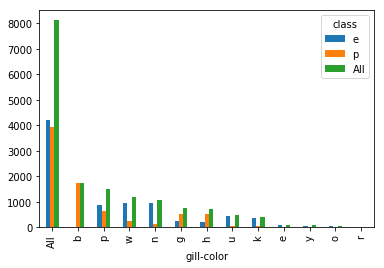

stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


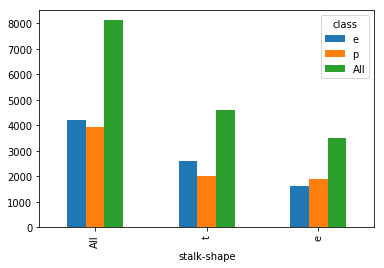

stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


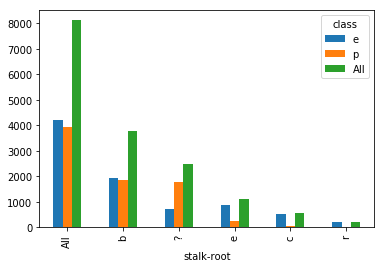

stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


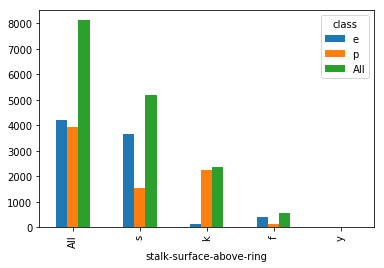

stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


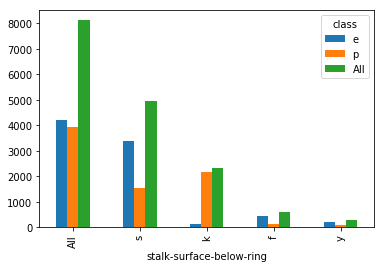

stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


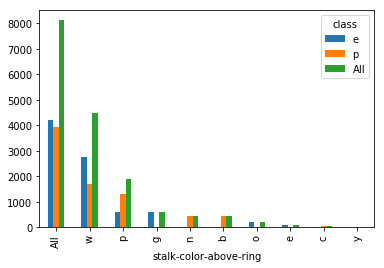

stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


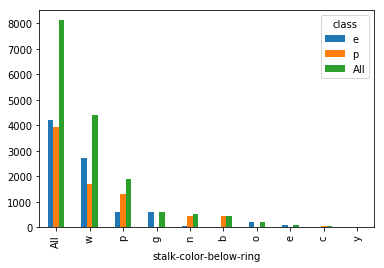

veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


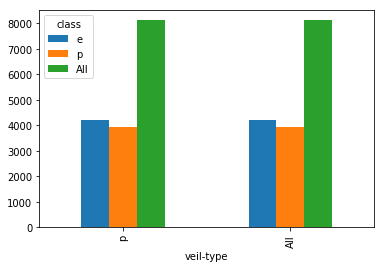

veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


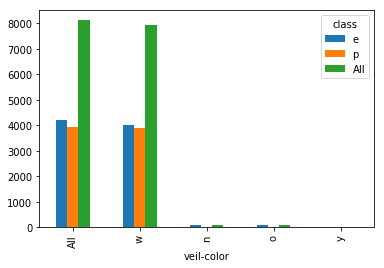

ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


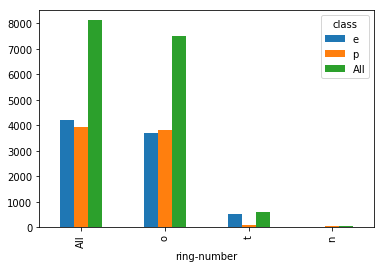

ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


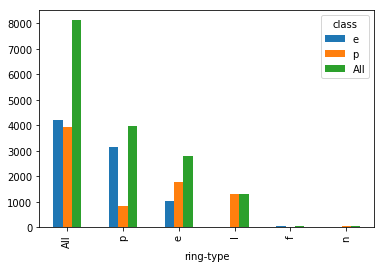

spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


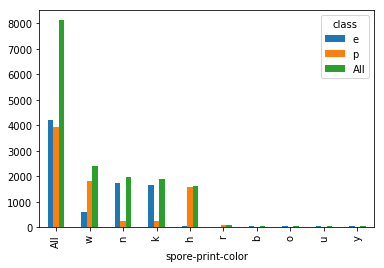

population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


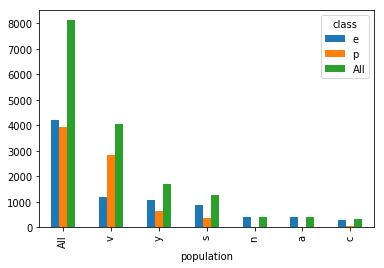

habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


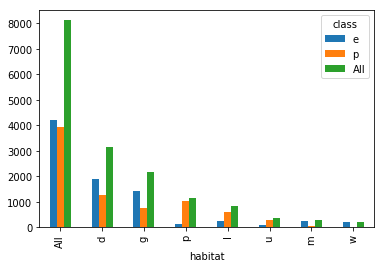

In [2]:
for col in df_csv.columns:
    if col=="class":
        continue

    df_cross = pd.crosstab(index=[df_csv["class"]], columns=df_csv[col],margins=True)
    display(df_cross)
    df_cross_show = df_cross.T.sort_values(by=['All'], ascending=False)
    df_cross_show.plot.bar()
    plt.show()

#### 4.3欠測値の確認

In [3]:
pd.DataFrame(df_csv.isnull().sum(), columns=["num of missing"])

,num of missing
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


上記集計では欠測値NaNは確認されず

#### 4.4データの前処理

#### 4.4.1データ置換＆削除

In [4]:
#stalk-root”の”？”を”nan”に置換
df_csv_rep = df_csv.replace('?', 'n')

#カラム”veil-type”を削除
del df_csv_rep['veil-type']

for col in df_csv_rep.columns:
    if col=="class":
        continue

    df_cross = pd.crosstab(index=[df_csv_rep["class"]], columns=df_csv_rep[col],margins=True)
    display(df_cross)

cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


stalk-root,b,c,e,n,r,All
class,,,,,,
e,1920,512,864,720,192,4208
p,1856,44,256,1760,0,3916
All,3776,556,1120,2480,192,8124


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


#### 4.4.2質的変数をダミー変数に変換

In [5]:
use_col =['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring','veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

dum_mushrooms = pd.get_dummies(df_csv_rep[use_col]) 
display(dum_mushrooms.head())
display(dum_mushrooms.tail())
np.savetxt('dum_mushrooms_2.csv',dum_mushrooms, delimiter=',')

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# ダミー変数変換後のデータセットキーの確認
print(dum_mushrooms.keys())

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)


### 5.目的変数を説明するのに有効そうな説明変数。また、それらが有効だと考えた理由を文章で。

#### 5.1説明変数選択検討

#### 5.1.1相関係数チェック

In [7]:
#相関の計算
display(dum_mushrooms.corr().sort_values(by='class_p').head())
#display(dum_mushrooms.corr().sort_values(by='class_p').tail())
#相関係数の出力
dum_mushrooms.corr().to_csv('correlation.csv')

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class_e,1.000000,-1.000000,0.182567,-0.023007,-0.018526,-0.163565,0.060664,0.026886,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.126123,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087
odor_n,0.785557,-0.785557,-0.000314,0.025332,0.066856,-0.098152,0.071775,-0.015817,0.286171,0.025332,...,-0.009620,-0.275386,0.136724,0.228838,0.089642,-0.086260,-0.121145,-0.326140,-0.076202,0.177576
ring-type_p,0.540469,-0.540469,0.237666,0.000514,-0.061414,-0.207080,0.064357,0.068457,0.062610,0.022715,...,0.173763,-0.203531,0.123061,0.245869,-0.056477,-0.167616,0.197609,-0.299297,0.222924,-0.152022
gill-size_b,0.540024,-0.540024,0.148449,-0.033174,0.075766,-0.306333,-0.093993,0.056995,0.257889,-0.033174,...,0.119577,-0.506475,0.298685,0.016064,0.323808,-0.336217,0.129183,-0.170190,-0.141152,0.104090
bruises_t,0.501530,-0.501530,0.115686,0.003803,0.045188,-0.229578,-0.053026,0.048557,-0.028808,0.026321,...,0.072997,-0.179268,0.162030,0.264457,-0.131746,-0.278238,0.228986,-0.249460,0.143017,0.184507


![Imgur](https://i.imgur.com/72cH1eB.jpg)

#### 相関（絶対値ベース）の高い上位8変数(相関50%超)について以下検討

In [8]:
#目的変数と説明変数のみのデータフレームを作成
y_var = "class_p"
X_var = ["odor_n","odor_f","stalk-surface-above-ring_k","stalk-surface-below-ring_k","ring-type_p","gill-size_n","gill-size_b","gill-color_b"]

df = dum_mushrooms[[y_var]+ X_var]
display(df.head())
display(df.tail())

,class_p,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b
0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,1,0


,class_p,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b
8119,0,1,0,0,0,1,0,1,0
8120,0,1,0,0,0,1,0,1,0
8121,0,1,0,0,0,1,0,1,0
8122,1,0,0,0,1,0,1,0,1
8123,0,1,0,0,0,1,0,1,0


<相関マトリクス>


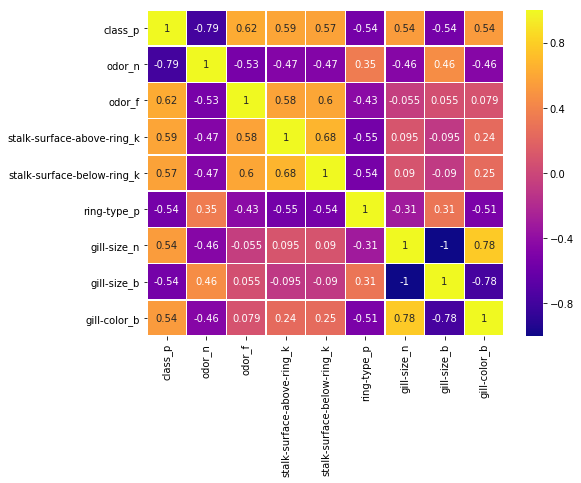

In [9]:
import seaborn as sns
%matplotlib inline 
print('<相関マトリクス>')
plt.figure(figsize=(8, 6)) #heatmap size
sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=.5) # annot:値表示/非表示 linewidths: しきり線

#### 5.1.2多重共線性

In [10]:
from sklearn.linear_model import LinearRegression
dfd = df.drop(["class_p"],axis=1)
for cname in dfd.columns:  
    y=dfd[cname]
    X=dfd.drop(cname, axis=1)

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y) # 決定係数R^2
    print(cname,":" ,1/(1-np.power(rsquared,2)))

odor_n : 1.4376315079126751
odor_f : 1.4538106738804808
stalk-surface-above-ring_k : 1.4388818055609423
stalk-surface-below-ring_k : 1.4511619435440337
ring-type_p : 1.3606191695081666
gill-size_n : inf
gill-size_b : inf
gill-color_b : 1.8997969322751975


C:\Users\yt690\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


##### 多重共線性なし

#### 5.1.3ステップワイズ法

In [11]:
#Rを用いた変数選択(ステップワイズ法)
import pyper #pyperとRを事前にインストールしておく必要がある
r = pyper.R(use_pandas='True')
r.assign('df', df)# Rへデータ渡す
print(r("step(lm(class_p~.,data=df))")) # Rのコマンド実行

try({step(lm(class_p~.,data=df))})
Start:  AIC=-24805.46
class_p ~ odor_n + odor_f + stalk.surface.above.ring_k + stalk.surface.below.ring_k + 
    ring.type_p + gill.size_n + gill.size_b + gill.color_b


Step:  AIC=-24805.46
class_p ~ odor_n + odor_f + stalk.surface.above.ring_k + stalk.surface.below.ring_k + 
    ring.type_p + gill.size_n + gill.color_b

                             Df Sum of Sq    RSS    AIC
<none>                                    382.70 -24806
- gill.color_b                1     0.109 382.81 -24805
- stalk.surface.below.ring_k  1     4.235 386.94 -24718
- ring.type_p                 1     4.620 387.32 -24710
- stalk.surface.above.ring_k  1    14.092 396.79 -24514
- gill.size_n                 1    95.240 477.94 -23002
- odor_f                      1    96.171 478.87 -22986
- odor_n                      1    99.815 482.52 -22925

Call:
lm(formula = class_p ~ odor_n + odor_f + stalk.surface.above.ring_k + 
    stalk.surface.below.ring_k + ring.type_p + gill.size_n 

#### ステップワイズ法で選択された変数

![Imgur](https://i.imgur.com/SyiUTJV.jpg)

![Imgur](https://i.imgur.com/iawppk2.jpg)

![Imgur](https://i.imgur.com/DGQbDzV.jpg)

#### 厚生労働省HP　自然毒のリスクプロファイル　http://www.mhlw.go.jp/stf/seisakunitsuite/bunya/0000142114.html

![Imgur](https://i.imgur.com/OlAoZIW.jpg)

![Imgur](https://i.imgur.com/WdYxc6f.jpg)

##### きのこ　、食･毒の簡単な見分け方・・・！http://dokitto.com/KINDANnoHAKO/kindan1-shokudoku.htm

#### 5.1.4AICを用いた検証

In [12]:
#全ての組み合わせをHP#全ての組み合わせを試す
import statsmodels.api as sm #線形回帰分析と同時にAICを計算
import itertools #組み合わせを求める
count = 1
for i in range(8):
    combi = itertools.combinations(df.drop("class_p",axis=1).columns, i+1) #組み合わせを求める


    for v in combi:
        y = df["class_p"]
        X = sm.add_constant(df[list(v)])
        model = sm.OLS(y, X).fit()
        if count == 1:
            min_aic = model.aic
            min_var = list(v)
        if min_aic > model.aic:
            min_aic = model.aic
            min_var = list(v)
        count += 1
        print("AIC:",round(model.aic), "変数:",list(v))
print("====minimam AIC====")
print(min_var,min_aic)

AIC: 3987.0 変数: ['odor_n']
AIC: 7781.0 変数: ['odor_f']
AIC: 8344.0 変数: ['stalk-surface-above-ring_k']
AIC: 8546.0 変数: ['stalk-surface-below-ring_k']
AIC: 8980.0 変数: ['ring-type_p']
AIC: 8985.0 変数: ['gill-size_n']
AIC: 8985.0 変数: ['gill-size_b']
AIC: 9000.0 変数: ['gill-color_b']
AIC: 2583.0 変数: ['odor_n', 'odor_f']
AIC: 2541.0 変数: ['odor_n', 'stalk-surface-above-ring_k']
AIC: 2781.0 変数: ['odor_n', 'stalk-surface-below-ring_k']
AIC: 2100.0 変数: ['odor_n', 'ring-type_p']
AIC: 3061.0 変数: ['odor_n', 'gill-size_n']
AIC: 3061.0 変数: ['odor_n', 'gill-size_b']
AIC: 3061.0 変数: ['odor_n', 'gill-color_b']
AIC: 6709.0 変数: ['odor_f', 'stalk-surface-above-ring_k']
AIC: 6916.0 変数: ['odor_f', 'stalk-surface-below-ring_k']
AIC: 6462.0 変数: ['odor_f', 'ring-type_p']
AIC: 1437.0 変数: ['odor_f', 'gill-size_n']
AIC: 1437.0 変数: ['odor_f', 'gill-size_b']
AIC: 3708.0 変数: ['odor_f', 'gill-color_b']
AIC: 7607.0 変数: ['stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']
AIC: 7458.0 変数: ['stalk-surface-above-ring_

AIC: 3021.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-color_b']
AIC: 331.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-size_n']
AIC: 331.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-size_b']
AIC: 3102.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-color_b']
AIC: 357.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'gill-size_n', 'gill-size_b']
AIC: 330.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'gill-size_n', 'gill-color_b']
AIC: 330.0 変数: ['odor_f', 'stalk-surface-above-ring_k', 'gill-size_b', 'gill-color_b']
AIC: 580.0 変数: ['odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_n']
AIC: 580.0 変数: ['odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_b']
AIC: 3336.0 変数: ['odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-color_b']
AIC: 636.0 変数: ['odor_f', 'stalk-surface-below-ring_k', 'gill-size_n', 'gill-size_b']
AIC: 612.0 変数: ['odor_f', 'stal

AIC: -1655.0 変数: ['odor_n', 'odor_f', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'gill-size_b', 'gill-color_b']
AIC: -1664.0 変数: ['odor_n', 'odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-size_n', 'gill-size_b']
AIC: -1663.0 変数: ['odor_n', 'odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-size_n', 'gill-color_b']
AIC: -1663.0 変数: ['odor_n', 'odor_f', 'stalk-surface-above-ring_k', 'ring-type_p', 'gill-size_b', 'gill-color_b']
AIC: -1525.0 変数: ['odor_n', 'odor_f', 'stalk-surface-above-ring_k', 'gill-size_n', 'gill-size_b', 'gill-color_b']
AIC: -1458.0 変数: ['odor_n', 'odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_n', 'gill-size_b']
AIC: -1459.0 変数: ['odor_n', 'odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_n', 'gill-color_b']
AIC: -1459.0 変数: ['odor_n', 'odor_f', 'stalk-surface-below-ring_k', 'ring-type_p', 'gill-size_b', 'gill-color_b']
AIC: -1251.0 変数: ['odor_n', 'odor_f', 'stalk-surface-below-ring_k', 'gill-s

##### ステップワイズ法と同じ変数が選択された。

### 6.使えそうなアルゴリズムの候補

#### 6.1重回帰分析

#### 6.1.1ステップワイズ法・AICにより選択された説明変数を用いる

In [13]:
#予測性能を評価するにあたり、検討に利用できるデータセットを学習用データとテスト用データにわける。
#交差検証を行うと、データセットの全てを用いた評価を行える。
#回帰問題の評価指標は、MSE、RSME、MAEなど。
y_var = "class_p"
X_var = ["odor_n","odor_f","stalk-surface-above-ring_k","stalk-surface-below-ring_k","ring-type_p","gill-size_n","gill-color_b"]

df_7 = dum_mushrooms[[y_var]+ X_var]


y = df_7["class_p"].values
X = df_7[['odor_n','odor_f','stalk-surface-above-ring_k','stalk-surface-below-ring_k','ring-type_p','gill-size_n','gill-color_b']].values

#### 6.1.2交差検証

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5, random_state=1234, shuffle=True)
kf.get_n_splits(X, y)

df_result = pd.DataFrame()

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)
    print("決定係数=",regr.score(X_train, y_train))
    y_pred = regr.predict(X_test)
    
    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
    df_result = pd.concat([df_result, df], axis=0)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )

TRAIN: [   0    1    3 ... 8121 8122 8123] TEST: [   2    5    6 ... 8109 8111 8113]
決定係数= 0.8162604192820628
TRAIN: [   2    3    4 ... 8121 8122 8123] TEST: [   0    1   11 ... 8104 8118 8120]
決定係数= 0.8119434090147346
TRAIN: [   0    1    2 ... 8119 8120 8122] TEST: [  12   13   24 ... 8117 8121 8123]
決定係数= 0.8107488224384184
TRAIN: [   0    1    2 ... 8121 8122 8123] TEST: [   4   17   18 ... 8092 8095 8096]
決定係数= 0.808671737324202
TRAIN: [   0    1    2 ... 8120 8121 8123] TEST: [   3    7   10 ... 8116 8119 8122]
決定係数= 0.8092263264902784
MSE=0.023
RMSE=0.15
MAE=0.023


#### 6.1.3予測結果

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print("0:食用キノコ　1：毒キノコ Precision:適合率(精度) recall:再現率 f1-score:適合率と再現率の調和平均")
print("毒キノコ識別率：", accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      4208
          1       0.98      0.98      0.98      3916

avg / total       0.98      0.98      0.98      8124

0:食用キノコ　1：毒キノコ Precision:適合率(精度) recall:再現率 f1-score:適合率と再現率の調和平均
毒キノコ識別率： 0.9773510585918267


[[4112   96]
 [  88 3828]]


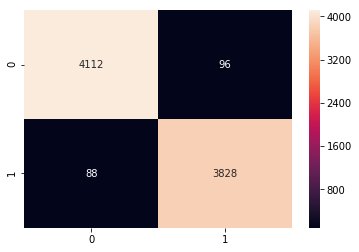

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
plt.show()

#### 6.2その他のclassifierによる検証（全説明変数を使用）

#### 6.2.1データ前処理

In [17]:
Y = pd.get_dummies(df_csv.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in df_csv.iloc[:,1:].columns:
    dummies = pd.get_dummies(df_csv[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

#### 6.2.2機械学習モデルをリストに格納

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LR(ロジスティツク回帰)', LogisticRegression()))
models.append(('KNN(K近傍法)', KNeighborsClassifier()))
models.append(('CART(決定木)', DecisionTreeClassifier()))
models.append(('GaussianNB(ガウシアンナイーブベイズ)', GaussianNB()))
models.append(('SVM(サポートベクタマシン)', SVC(probability=True)))
models.append(('RF(ランダムフォレスト)', RandomForestClassifier()))

#### 6.2.3複数のClassifierによる簡易検証

1 LR(ロジスティツク回帰): 0.999846 (0.000308)
2 LR(ロジスティツク回帰): 0.999846 (0.000308)
3 LR(ロジスティツク回帰): 0.999231 (0.000973)
4 LR(ロジスティツク回帰): 0.999846 (0.000308)
5 LR(ロジスティツク回帰): 0.999692 (0.000615)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


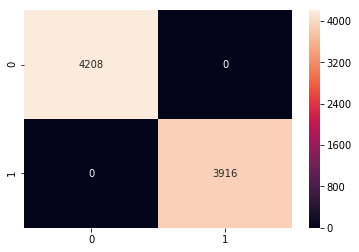

--------------------------------------------------
1 KNN(K近傍法): 1.000000 (0.000000)
2 KNN(K近傍法): 1.000000 (0.000000)
3 KNN(K近傍法): 0.999692 (0.000615)
4 KNN(K近傍法): 1.000000 (0.000000)
5 KNN(K近傍法): 1.000000 (0.000000)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


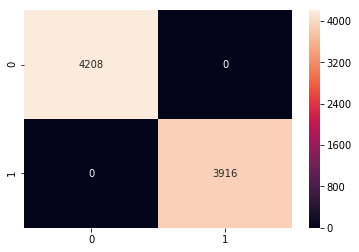

--------------------------------------------------
1 CART(決定木): 0.999846 (0.000308)
2 CART(決定木): 1.000000 (0.000000)
3 CART(決定木): 0.999538 (0.000923)
4 CART(決定木): 1.000000 (0.000000)
5 CART(決定木): 0.999538 (0.000923)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


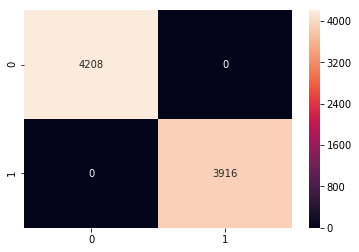

--------------------------------------------------
1 GaussianNB(ガウシアンナイーブベイズ): 0.966764 (0.004701)
2 GaussianNB(ガウシアンナイーブベイズ): 0.956300 (0.006250)
3 GaussianNB(ガウシアンナイーブベイズ): 0.952455 (0.013243)
4 GaussianNB(ガウシアンナイーブベイズ): 0.951991 (0.007186)
5 GaussianNB(ガウシアンナイーブベイズ): 0.962462 (0.006388)
毒キノコ識別率(accuracy)：0.959872
             precision    recall  f1-score   support

          0   0.999228  0.923241  0.959733      4208
          1   0.923749  0.999234  0.960010      3916

avg / total   0.962845  0.959872  0.959867      8124

[[3885  323]
 [   3 3913]]


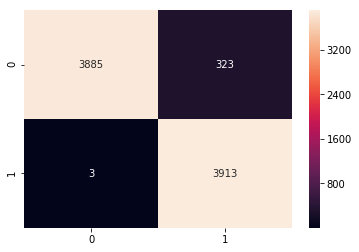

--------------------------------------------------
1 SVM(サポートベクタマシン): 0.997692 (0.000843)
2 SVM(サポートベクタマシン): 0.997692 (0.001614)
3 SVM(サポートベクタマシン): 0.998308 (0.001846)
4 SVM(サポートベクタマシン): 0.997384 (0.001982)
5 SVM(サポートベクタマシン): 0.997692 (0.001614)
毒キノコ識別率(accuracy)：0.998523
             precision    recall  f1-score   support

          0   0.997156  1.000000  0.998576      4208
          1   1.000000  0.996936  0.998465      3916

avg / total   0.998527  0.998523  0.998523      8124

[[4208    0]
 [  12 3904]]


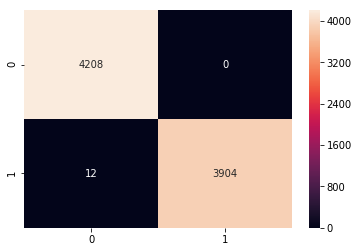

--------------------------------------------------
1 RF(ランダムフォレスト): 1.000000 (0.000000)
2 RF(ランダムフォレスト): 1.000000 (0.000000)
3 RF(ランダムフォレスト): 1.000000 (0.000000)
4 RF(ランダムフォレスト): 1.000000 (0.000000)
5 RF(ランダムフォレスト): 1.000000 (0.000000)
毒キノコ識別率(accuracy)：1.000000
             precision    recall  f1-score   support

          0   1.000000  1.000000  1.000000      4208
          1   1.000000  1.000000  1.000000      3916

avg / total   1.000000  1.000000  1.000000      8124

[[4208    0]
 [   0 3916]]


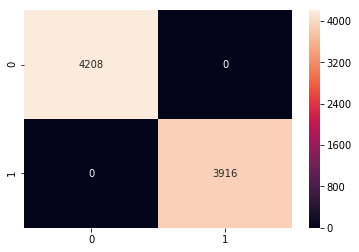

--------------------------------------------------


In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics as mtr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

results = []
names = []
model_predictions = defaultdict()
model_score = defaultdict(np.float)

for name, model in models:   
    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, Y)
    df_result = pd.DataFrame()
    i = 0
    #print(name)
    
    for train_index, test_index in kf.split(X, Y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
        cv_results = cross_val_score(model, X_train, y_train.iloc[:,1], cv=kf, scoring='accuracy')    
        results.append(cv_results)
        names.append(name)
        i = i + 1
        msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
        print(i,msg)

        model.fit(X_train, y_train.iloc[:,1])
        y_pred = model.predict(X_test)
        df = pd.DataFrame({"y_test":y_test.iloc[:,1], "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)

    # 評価指標の算出
    y_test = df_result["y_test"]
    y_pred = df_result["y_pred"]
    print("毒キノコ識別率(accuracy)：%7.6f" %  (accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred,digits=6))
   
    print(confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d')
    plt.show()
    print("--------------------------------------------------")

#### 上記結果から以下のClassifier が有効
##### ロジステック回帰、K近傍法、決定木、ランダムフォレスト

#### 6.3ニューラルネットワーク

In [20]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from keras import backend as K

seed = 123456 

def create_model():
    model = Sequential()
    model.add(Dense(80, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1)) 
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(0.1)) 
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.1)) 
    model.add(Dense(2, activation='softmax'))    
   
    sgd = SGD(lr=0.01, momentum=0.7, decay=0, nesterov=False)
    model.compile(loss='binary_crossentropy' , optimizer='sgd', metrics=['accuracy'])
    return model

C:\Users\yt690\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


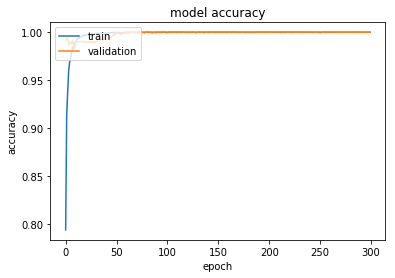

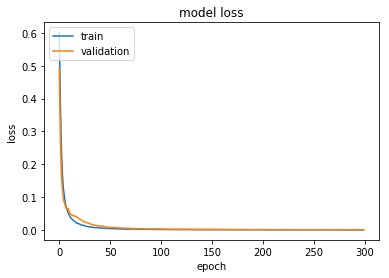

In [21]:
model = create_model()
history = model.fit(X.values, Y.values, validation_split=0.10, epochs=300, batch_size=100, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
print("Training accuracy: %.2f%% / Validation accuracy: %.2f%%" % 
      (100*history.history['acc'][-1], 100*history.history['val_acc'][-1]))

Training accuracy: 100.00% / Validation accuracy: 100.00%
